##  Sensitivity Analysis for Evapotranspiration according to the change of input paramters in the Reynolds Mountain East catchment using pySUMMA

## 1. Introduction

This study is to analyze the sensitivity for Evapotranspiration according to the change of input parameters using a SUMMA model for the Reynolds Mountain East catchment. This study looked at the twelve parameters to analyze the impact on Evapotranspiration. 

In this Jupyter Notebook, the pySUMMA library is used to produce this analysis. First, the input parameters are described. Next, the Methods section describes how the pySUMMA can be used to 

 1) Explanation of the study area : the Reynolds Mountain East catchment
 
 2) How to download TestCases from HS and Installation to prepare SUMMA simulation

 3) Creating pySUMMA Simulation Object and setting SUMMA executable
 
 4) Creating Parameter Trial obejct to read "Param Trial input netcdf file"
 
 5) Running SUMMA with the change of input parameters
 
 6) Creating Pandas DataFrame from output netcdf of SUMMA

Collectively, this Jupyter Notebook serves as an example of how hydrologic modeling can be conducted directly within a Jupyter Notebook by leveraging the pySUMMA library. 

## 2. Background 

### The Sensitivity Analysis with the input parameters in SUMMA

In [4]:
#import libraries to display equations within the notebook
from IPython.display import display, Math, Latex

### 1.) Input parameter in param_trial NetCDF for SUMMA

 |  Parameters      |  Min       |   Max       |   Step (Max-Min)/10 | Description |
 |:------------------:|------------|-------------|---------------------|:-------------|
  |rootDistExp       |  0.01      |   1.0       | 0.099               | exponent controlling the vertical distribution of root density (-)    |
 |k_soil            |  0.0000001 |   0.00001   | 0.00000099          | hydraulic conductivity of soil (m s-1)    |
 |qSurfScale        |  1.0       | 100.0       | 9.9                 | scaling factor in the surface runoff parameterization (-)    |
 |summerLAI         |  0.01      |  10.0       | 0.999               | maximum leaf area index at the peak of the growing season (m2 m-2)    |
 |theta_mp          |  0.3       |   0.6       | 0.03                | volumetric liquid water content when macropore flow begins (-)    |
 |theta_res         |  0.001     |   0.1       | 0.0099              | volumetric residual water content (-)    |
 |theta_sat         |  0.3       |   0.6       | 0.03                | porosity (-)    |
 |vGn_alpha         | -1.0       |  -0.01      | 0.099               | van Genuchten "alpha" parameter (m-1)    |
 |vGn_n             |  1.0       |   3.0       | 0.2                 | van Genuchten "n" parameter (-)    |
 |winterSAI         |  0.01      |   3.0       | 0.299               | stem area index prior to the start of the growing season (m2 m-2)    |
  |critSoilTranspire |  0.0       |   1.0       | 0.1                 |  critical vol. liq. water content when transpiration is limited (-)            |  
 |critSoilWilting   |  0.0       |   1.0       | 0.1                 | critical vol. liq. water content when plants are wilting (-)    |

## 3. Methods

### 1) Study Area

#### The Reynolds Mountain East catchment is located in southwestern Idaho as shown in the figure below.

In [1]:
from ipyleaflet import Map, GeoJSON
import json

In [2]:
m = Map(center=[43.06745, -116.75489], zoom=15)
with open('reynolds_geojson_latlon.geojson') as f:
    data = json.load(f)
g = GeoJSON(data=data)
m.add_layer(g)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### 2) Download TestCases from HS and Installation to prepare SUMMA simulation

In [3]:
# To authenticate using HTTP Basic authentication.
from hs_restclient import HydroShare, HydroShareAuthBasic

In [4]:
# import utils.py to download TestCases from HS, unzip and installation
from pysumma.utils import utils

In [21]:
# set TestCase directory
save_filepath = '/home/choi/Desktop/pysumma/TestCase'

In [8]:
# call install_test_cases_hs method to download TestCase from HS, unzip and install the TestCase.
hs_path = utils.install_test_cases_hs(hs, resource_id, save_filepath)

In [22]:
# previously downloaded testcase, just set hs_path without previous step
hs_path = save_filepath+'/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents'

### 3) Create pySUMMA Simulation Object and set SUMMA executable

In [23]:
from pysumma.Simulation import Simulation

In [24]:
# create a pySUMMA simulation object using the SUMMA 'file manager' input file 
S = Simulation(hs_path + '/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt')

ModelOuput master file filepath: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/var_lookup.f90


In [25]:
# set the simulation start and finish times
S.decision_obj.simulStart.value = "2007-10-01 00:00"
S.decision_obj.simulFinsh.value = "2008-09-31 00:00"

### 4) Create Param Trial obejct to read "Param Trial input netcdf file"

In [26]:
import netCDF4 as nc
import numpy as np

In [27]:
# set the filepath of param trial NetCDF file
Param_Trial_path = S.setting_path.value + S.para_trial.value
Param_Trial_path_for_netcdf = Param_Trial_path.replace("/", "//")

In [28]:
# create netCDF4 Dataset
Param_Trial = nc.Dataset(Param_Trial_path_for_netcdf,'r+')
Param_Trial

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: Converted to NetCDF using "/Users/nijssen/Dropbox/data/PLUMBER/PLUMBER_data/tools/paramTrial_ascii_to_nc.py --ascii_in summa_zParamTrial_riparianAspen.txt --nc_out summa_zParamTrial_riparianAspen.nc" on 2017-08-30 13:37:17

    dimensions(sizes): hru(1)
    variables(dimensions): float64 hruIndex(hr), float64 frozenPrecipMultip(hr), float64 theta_mp(hr), float64 theta_sat(hr), float64 theta_res(hr), float64 vGn_alpha(hr), float64 vGn_n(hr), float64 f_impede(hr), float64 k_soil(hr), float64 k_macropore(hr), float64 critSoilWilting(hr), float64 critSoilTranspire(hr), float64 winterSAI(hr), float64 summerLAI(hr), float64 heightCanopyTop(hr), float64 heightCanopyBottom(hr), float64 kAnisotropic(hr), float64 rootDistExp(hr), float64 zScale_TOPMODEL(hr), float64 qSurfScale(hr)
    groups: 

### 5) Running SUMMA with the change of input parameters

### 5-1) Parameter1 = rootDistExp

In [29]:
#set the name of parameter
name = 'rootDistExp'

In [30]:
# Create name_value object to check the value of rootDistExp parameter
name_value = Param_Trial.variables[name][:]
name_value

masked_array(data = [1.0],
             mask = [False],
       fill_value = nan)

In [31]:
# set min, max, delta value
min_para = 0.01
max_para = 1.00
if max_para/10 > min_para:
    delta = round((max_para)/10, 2)
else:
    delta = (max_para-min_para)/10
    delta = round(delta, 2)

In [32]:
# create parameter list object
parameter=[]
for i in np.arange(min_para, max_para+delta, delta):
    if i > max_para:
        i = max_para
    parameter.append("%.2f"%i)
parameter

['0.01',
 '0.11',
 '0.21',
 '0.31',
 '0.41',
 '0.51',
 '0.61',
 '0.71',
 '0.81',
 '0.91',
 '1.00']

In [13]:
# simulate SUMMA model according to parameter
for i in np.arange(min_para, max_para+delta, delta):
    name_value[0] = i
    if i > max_para:
        i = max_para
    Param_Trial = nc.Dataset(Param_Trial_path_for_netcdf,'r+')
    Param_Trial.variables[name][:] = name_value
    results_evapotranspiration_rootDisExp, output_path = S.execute(run_suffix="rootDistExp"+str(i), run_option = 'docker_sopron_2018')
    Param_Trial.close()
    print (i)

file_suffix is 'rootDistExp0.01'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 15:52:26
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richa

file_suffix is 'rootDistExp0.31'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 15:52:46
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richa

file_suffix is 'rootDistExp0.61'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 15:53:05
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richa

file_suffix is 'rootDistExp0.91'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 15:53:25
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richa

#### Create pandas dataframe from NetCDF output           

In [33]:
# check output directory
output_path = S.output_path.value
output_path

'/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/output/wrrPaperTestCases/figure07/'

In [34]:
# check SUMMA output file of the rootDisExp parameter's change
import os
name_list = os.listdir(output_path)
full_list = [os.path.join(output_path,i) for i in name_list]
time_sorted_list = sorted(full_list, key=os.path.getmtime)
run_suffix = 'rootDistExp'
output_list = [x for x in time_sorted_list if run_suffix in x]
output_list

['/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/output/wrrPaperTestCases/figure07/vegImpactsTranspire_output_rootDistExp0.11_timestep.nc',
 '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/output/wrrPaperTestCases/figure07/vegImpactsTranspire_output_rootDistExp0.21_timestep.nc',
 '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/output/wrrPaperTestCases/figure07/vegImpactsTranspire_output_rootDistExp0.31_timestep.nc',
 '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/output/wrrPaperTestCases/figure07/vegImpactsTranspire_output_rootDistExp0.41_timestep.nc',
 '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764b

In [35]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.figsize(x=20, y=5)

In [36]:
# create pandas DataFrame hourly
ds = xr.open_dataset(output_list[0])
date = ds['scalarCanopyTranspiration'].time
total_ET_df = pd.DataFrame(index = date)
total_ET_df.index = total_ET_df.index.round("H")

In [37]:
# get the value of Total Evapotranspiration from SUMMA output
for i in range(0,11,1):
    ds = xr.open_dataset(output_list[i])
    # Total Evapotranspiration = Canopy Transpiration + Canopy Evaporation + Ground Evaporation
    # Change unit from kgm-2s-1 to mm/hr (mulpitle 3600)
    Total_Evapotranspiration = (ds['scalarCanopyTranspiration'].values+ds['scalarCanopyEvaporation'].values+ds['scalarGroundEvaporation'].values)*3600
    ET_df = pd.DataFrame(Total_Evapotranspiration, index = total_ET_df.index, columns=['rootDist='+str(parameter[i])])
    total_ET_df = total_ET_df.join(ET_df)

In [38]:
total_ET_df.head()

,rootDist=0.01,rootDist=0.11,rootDist=0.21,rootDist=0.31,rootDist=0.41,rootDist=0.51,rootDist=0.61,rootDist=0.71,rootDist=0.81,rootDist=0.91,rootDist=1.00
time,,,,,,,,,,,
2007-10-01 00:00:00,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278
2007-10-01 01:00:00,-0.248654,-0.248621,-0.248595,-0.248575,-0.248559,-0.248547,-0.248538,-0.248531,-0.248526,-0.248522,-0.248519
2007-10-01 02:00:00,-0.214416,-0.214434,-0.214438,-0.214435,-0.214430,-0.214424,-0.214419,-0.214414,-0.214411,-0.214408,-0.214405
2007-10-01 03:00:00,-0.201183,-0.201243,-0.201272,-0.201285,-0.201290,-0.201290,-0.201288,-0.201285,-0.201282,-0.201279,-0.201277
2007-10-01 04:00:00,-0.220470,-0.220562,-0.220607,-0.220625,-0.220630,-0.220628,-0.220623,-0.220617,-0.220611,-0.220605,-0.220601


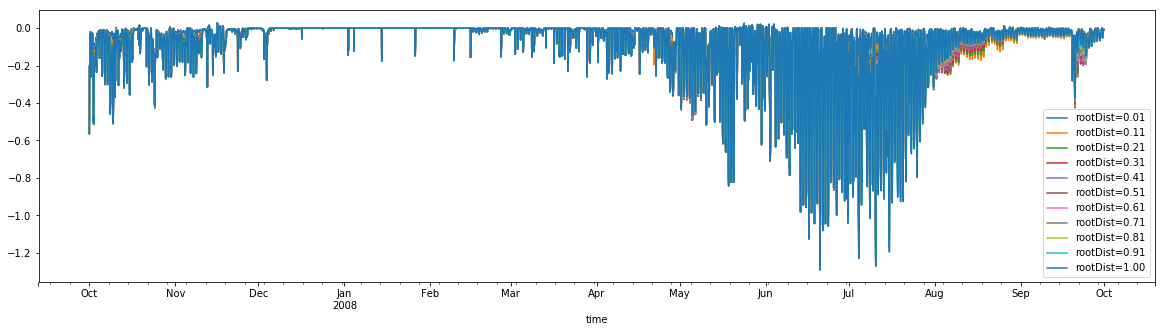

In [39]:
total_ET_df.plot()
plt.show()

In [40]:
# resampleing monthly
total_ET_df_month = total_ET_df.resample("M").mean()
# highlight monthly maximum 
total_ET_df_month.style.highlight_max()

,rootDist=0.01,rootDist=0.11,rootDist=0.21,rootDist=0.31,rootDist=0.41,rootDist=0.51,rootDist=0.61,rootDist=0.71,rootDist=0.81,rootDist=0.91,rootDist=1.00
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.0631317,-0.0837833,-0.0933354,-0.0985881,-0.101612,-0.103361,-0.104279,-0.104739,-0.104927,-0.104945,-0.104849
2007-11-30 00:00:00,-0.0259706,-0.036175,-0.041505,-0.0448192,-0.047004,-0.0483334,-0.0491649,-0.0496225,-0.0498372,-0.0499089,-0.0498941
2007-12-31 00:00:00,-0.00397536,-0.0045237,-0.00474145,-0.00480811,-0.0048545,-0.00489075,-0.00491788,-0.00493726,-0.0049522,-0.00496364,-0.00497233
2008-01-31 00:00:00,-0.00166233,-0.00166237,-0.00166239,-0.0016624,-0.0016624,-0.00166241,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166242
2008-02-29 00:00:00,-0.00479473,-0.00479527,-0.00479377,-0.00478151,-0.00476898,-0.00475666,-0.00474377,-0.00473096,-0.00471935,-0.004709,-0.00469981
2008-03-31 00:00:00,-0.0147508,-0.0154065,-0.0155147,-0.0154668,-0.0154363,-0.015406,-0.0154692,-0.0154378,-0.0154089,-0.0153937,-0.0153595
2008-04-30 00:00:00,-0.0288863,-0.0398127,-0.0463613,-0.0498999,-0.0518136,-0.0527266,-0.0529932,-0.0529036,-0.052702,-0.0524966,-0.052297
2008-05-31 00:00:00,-0.157569,-0.157992,-0.158234,-0.158132,-0.157992,-0.157828,-0.157635,-0.15743,-0.157231,-0.157048,-0.156884
2008-06-30 00:00:00,-0.268219,-0.294842,-0.297771,-0.298609,-0.298924,-0.299138,-0.299181,-0.299146,-0.299132,-0.299132,-0.299119


In [41]:
# highlight monthly minimum 
total_ET_df_month.style.highlight_min()

,rootDist=0.01,rootDist=0.11,rootDist=0.21,rootDist=0.31,rootDist=0.41,rootDist=0.51,rootDist=0.61,rootDist=0.71,rootDist=0.81,rootDist=0.91,rootDist=1.00
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.0631317,-0.0837833,-0.0933354,-0.0985881,-0.101612,-0.103361,-0.104279,-0.104739,-0.104927,-0.104945,-0.104849
2007-11-30 00:00:00,-0.0259706,-0.036175,-0.041505,-0.0448192,-0.047004,-0.0483334,-0.0491649,-0.0496225,-0.0498372,-0.0499089,-0.0498941
2007-12-31 00:00:00,-0.00397536,-0.0045237,-0.00474145,-0.00480811,-0.0048545,-0.00489075,-0.00491788,-0.00493726,-0.0049522,-0.00496364,-0.00497233
2008-01-31 00:00:00,-0.00166233,-0.00166237,-0.00166239,-0.0016624,-0.0016624,-0.00166241,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166242
2008-02-29 00:00:00,-0.00479473,-0.00479527,-0.00479377,-0.00478151,-0.00476898,-0.00475666,-0.00474377,-0.00473096,-0.00471935,-0.004709,-0.00469981
2008-03-31 00:00:00,-0.0147508,-0.0154065,-0.0155147,-0.0154668,-0.0154363,-0.015406,-0.0154692,-0.0154378,-0.0154089,-0.0153937,-0.0153595
2008-04-30 00:00:00,-0.0288863,-0.0398127,-0.0463613,-0.0498999,-0.0518136,-0.0527266,-0.0529932,-0.0529036,-0.052702,-0.0524966,-0.052297
2008-05-31 00:00:00,-0.157569,-0.157992,-0.158234,-0.158132,-0.157992,-0.157828,-0.157635,-0.15743,-0.157231,-0.157048,-0.156884
2008-06-30 00:00:00,-0.268219,-0.294842,-0.297771,-0.298609,-0.298924,-0.299138,-0.299181,-0.299146,-0.299132,-0.299132,-0.299119


In [42]:
# display monthly gradient according to the the value
total_ET_df_month.style.background_gradient()

,rootDist=0.01,rootDist=0.11,rootDist=0.21,rootDist=0.31,rootDist=0.41,rootDist=0.51,rootDist=0.61,rootDist=0.71,rootDist=0.81,rootDist=0.91,rootDist=1.00
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.0631317,-0.0837833,-0.0933354,-0.0985881,-0.101612,-0.103361,-0.104279,-0.104739,-0.104927,-0.104945,-0.104849
2007-11-30 00:00:00,-0.0259706,-0.036175,-0.041505,-0.0448192,-0.047004,-0.0483334,-0.0491649,-0.0496225,-0.0498372,-0.0499089,-0.0498941
2007-12-31 00:00:00,-0.00397536,-0.0045237,-0.00474145,-0.00480811,-0.0048545,-0.00489075,-0.00491788,-0.00493726,-0.0049522,-0.00496364,-0.00497233
2008-01-31 00:00:00,-0.00166233,-0.00166237,-0.00166239,-0.0016624,-0.0016624,-0.00166241,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166242
2008-02-29 00:00:00,-0.00479473,-0.00479527,-0.00479377,-0.00478151,-0.00476898,-0.00475666,-0.00474377,-0.00473096,-0.00471935,-0.004709,-0.00469981
2008-03-31 00:00:00,-0.0147508,-0.0154065,-0.0155147,-0.0154668,-0.0154363,-0.015406,-0.0154692,-0.0154378,-0.0154089,-0.0153937,-0.0153595
2008-04-30 00:00:00,-0.0288863,-0.0398127,-0.0463613,-0.0498999,-0.0518136,-0.0527266,-0.0529932,-0.0529036,-0.052702,-0.0524966,-0.052297
2008-05-31 00:00:00,-0.157569,-0.157992,-0.158234,-0.158132,-0.157992,-0.157828,-0.157635,-0.15743,-0.157231,-0.157048,-0.156884
2008-06-30 00:00:00,-0.268219,-0.294842,-0.297771,-0.298609,-0.298924,-0.299138,-0.299181,-0.299146,-0.299132,-0.299132,-0.299119


In [43]:
# display monthly bar according to the the value
total_ET_df_month.style.bar()

,rootDist=0.01,rootDist=0.11,rootDist=0.21,rootDist=0.31,rootDist=0.41,rootDist=0.51,rootDist=0.61,rootDist=0.71,rootDist=0.81,rootDist=0.91,rootDist=1.00
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.0631317,-0.0837833,-0.0933354,-0.0985881,-0.101612,-0.103361,-0.104279,-0.104739,-0.104927,-0.104945,-0.104849
2007-11-30 00:00:00,-0.0259706,-0.036175,-0.041505,-0.0448192,-0.047004,-0.0483334,-0.0491649,-0.0496225,-0.0498372,-0.0499089,-0.0498941
2007-12-31 00:00:00,-0.00397536,-0.0045237,-0.00474145,-0.00480811,-0.0048545,-0.00489075,-0.00491788,-0.00493726,-0.0049522,-0.00496364,-0.00497233
2008-01-31 00:00:00,-0.00166233,-0.00166237,-0.00166239,-0.0016624,-0.0016624,-0.00166241,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166242
2008-02-29 00:00:00,-0.00479473,-0.00479527,-0.00479377,-0.00478151,-0.00476898,-0.00475666,-0.00474377,-0.00473096,-0.00471935,-0.004709,-0.00469981
2008-03-31 00:00:00,-0.0147508,-0.0154065,-0.0155147,-0.0154668,-0.0154363,-0.015406,-0.0154692,-0.0154378,-0.0154089,-0.0153937,-0.0153595
2008-04-30 00:00:00,-0.0288863,-0.0398127,-0.0463613,-0.0498999,-0.0518136,-0.0527266,-0.0529932,-0.0529036,-0.052702,-0.0524966,-0.052297
2008-05-31 00:00:00,-0.157569,-0.157992,-0.158234,-0.158132,-0.157992,-0.157828,-0.157635,-0.15743,-0.157231,-0.157048,-0.156884
2008-06-30 00:00:00,-0.268219,-0.294842,-0.297771,-0.298609,-0.298924,-0.299138,-0.299181,-0.299146,-0.299132,-0.299132,-0.299119


### - Create Sensitivity Analysis method

In [49]:
def sensitivity_analysis(name, min_para, max_para):
    # set the filepath of param trial NetCDF file
    Param_Trial_path = S.setting_path.value + S.para_trial.value
    Param_Trial_path_for_netcdf = Param_Trial_path.replace("/", "//")
    # create netCDF4 Dataset
    Param_Trial = nc.Dataset(Param_Trial_path_for_netcdf,'r+')
    Param_Trial
    # Create name_value object to check the value of rootDistExp parameter
    name_value = Param_Trial.variables[name][:]
    # set min, max, delta value
    if max_para/10 > min_para:
        delta = max_para/10
    else:
        delta = (max_para-min_para)/10
    # create parameter list object
    parameter=[]
    for i in np.arange(min_para, max_para+delta, delta):
        if i > max_para:
            i = max_para
        parameter.append(i)
    # simulate SUMMA model according to parameter
    for i in np.arange(min_para, max_para+delta, delta):
        name_value[0] = i
        if i > max_para:
            i = max_para
        Param_Trial = nc.Dataset(Param_Trial_path_for_netcdf,'r+')
        Param_Trial.variables[name][:] = name_value
        results_evapotranspiration, output_path = S.execute(run_suffix=name+str(i), run_option = 'docker_sopron_2018')
        Param_Trial.close()
        print (i)
    # check SUMMA output file of the rootDisExp parameter's change
    import os
    output_path = S.output_path.value
    name_list = os.listdir(output_path)
    full_list = [os.path.join(output_path,i) for i in name_list]
    time_sorted_list = sorted(full_list, key=os.path.getmtime)
    run_suffix = name
    output_list = [x for x in time_sorted_list if run_suffix in x]
    return name, parameter, output_list

### 5-2) Parameter2 = k_soil

In [50]:
para_name, parameter, k_soil_output_list = sensitivity_analysis('k_soil', 0.0000001, 0.00001)

file_suffix is 'k_soil1e-07'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:23:36
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richards:

file_suffix is 'k_soil3.1e-06'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:23:56
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

file_suffix is 'k_soil6.1e-06'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:24:15
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

file_suffix is 'k_soil9.1e-06'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:24:37
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

In [51]:
# create pandas DataFrame hourly
ds = xr.open_dataset(k_soil_output_list[0])
date = ds['scalarCanopyTranspiration'].time
total_ET_df = pd.DataFrame(index = date)
total_ET_df.index = total_ET_df.index.round("H")

In [52]:
# get the value of Total Evapotranspiration from SUMMA output
for i in range(0,11,1):
    ds = xr.open_dataset(k_soil_output_list[i])
    # Total Evapotranspiration = Canopy Transpiration + Canopy Evaporation + Ground Evaporation
    # Change unit from kgm-2s-1 to mm/hr (mulpitle 3600)
    Total_Evapotranspiration = (ds['scalarCanopyTranspiration'].values+ds['scalarCanopyEvaporation'].values+ds['scalarGroundEvaporation'].values)*3600
    ET_df = pd.DataFrame(Total_Evapotranspiration, index = total_ET_df.index, columns=[name+'='+str(parameter[i])])
    total_ET_df = total_ET_df.join(ET_df)

In [53]:
total_ET_df.head()

,k_soil=1e-07,k_soil=1.1e-06,k_soil=2.1e-06,k_soil=3.1e-06,k_soil=4.1e-06,k_soil=5.1e-06,k_soil=6.1e-06,k_soil=7.1e-06,k_soil=8.1e-06,k_soil=9.1e-06,k_soil=1e-05
time,,,,,,,,,,,
2007-10-01 00:00:00,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278,-0.562278
2007-10-01 01:00:00,-0.248488,-0.242750,-0.248531,-0.248526,-0.248522,-0.248517,-0.248512,-0.248507,-0.248503,-0.248498,-0.248493
2007-10-01 02:00:00,-0.214209,-0.209928,-0.214470,-0.214444,-0.214417,-0.214389,-0.214360,-0.214331,-0.214301,-0.214270,-0.214240
2007-10-01 03:00:00,-0.200968,-0.197311,-0.201399,-0.201348,-0.201299,-0.201249,-0.201200,-0.201152,-0.201105,-0.201058,-0.201013
2007-10-01 04:00:00,-0.220156,-0.216206,-0.220790,-0.220711,-0.220634,-0.220559,-0.220486,-0.220416,-0.220347,-0.220281,-0.220217


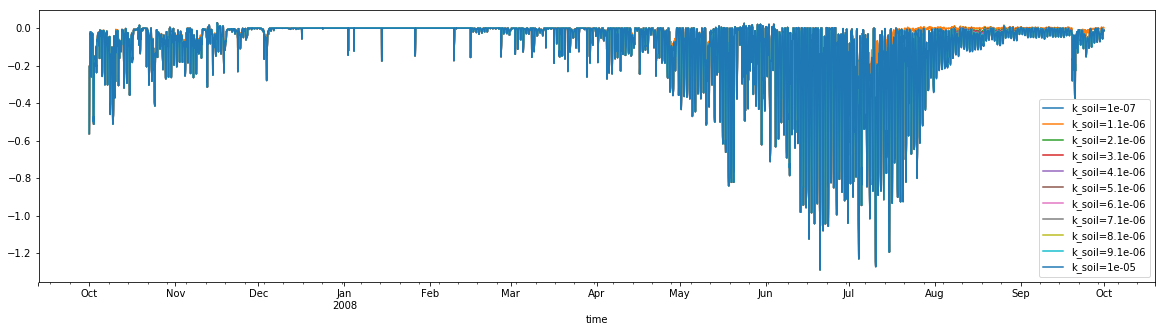

In [54]:
total_ET_df.plot()
plt.show()

In [55]:
# resampleing monthly
total_ET_df_month = total_ET_df.resample("M").mean()
# highlight monthly maximum 
total_ET_df_month.style.highlight_max()

,k_soil=1e-07,k_soil=1.1e-06,k_soil=2.1e-06,k_soil=3.1e-06,k_soil=4.1e-06,k_soil=5.1e-06,k_soil=6.1e-06,k_soil=7.1e-06,k_soil=8.1e-06,k_soil=9.1e-06,k_soil=1e-05
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.105068,-0.0994369,-0.104389,-0.104772,-0.104838,-0.104891,-0.104934,-0.104969,-0.105,-0.105026,-0.105048
2007-11-30 00:00:00,-0.0501239,-0.042632,-0.0492636,-0.0497874,-0.0498737,-0.0499279,-0.0499727,-0.0500107,-0.0500439,-0.0500735,-0.0501
2007-12-31 00:00:00,-0.00498359,-0.00423699,-0.00492812,-0.00496367,-0.00497086,-0.00497255,-0.00497434,-0.00497617,-0.00497803,-0.00497989,-0.00498175
2008-01-31 00:00:00,-0.00166241,-0.00166239,-0.00166243,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166241,-0.00166241,-0.00166241,-0.00166241
2008-02-29 00:00:00,-0.00472267,-0.00406808,-0.00465686,-0.00468948,-0.00469871,-0.00470315,-0.00470714,-0.00471076,-0.00471407,-0.00471714,-0.00472
2008-03-31 00:00:00,-0.0154193,-0.0137779,-0.0152513,-0.0153437,-0.0153673,-0.0153791,-0.0153897,-0.0153991,-0.015397,-0.0154157,-0.0154124
2008-04-30 00:00:00,-0.052509,-0.0416461,-0.0516452,-0.0521919,-0.052298,-0.0523334,-0.0523768,-0.0524089,-0.052437,-0.0524633,-0.0524867
2008-05-31 00:00:00,-0.15693,-0.139068,-0.156307,-0.15687,-0.156903,-0.156899,-0.1569,-0.156902,-0.156907,-0.156914,-0.156921
2008-06-30 00:00:00,-0.299127,-0.291842,-0.29917,-0.299126,-0.299117,-0.299118,-0.299114,-0.29911,-0.29911,-0.299139,-0.299139


In [56]:
# highlight monthly minimum 
total_ET_df_month.style.highlight_min()

,k_soil=1e-07,k_soil=1.1e-06,k_soil=2.1e-06,k_soil=3.1e-06,k_soil=4.1e-06,k_soil=5.1e-06,k_soil=6.1e-06,k_soil=7.1e-06,k_soil=8.1e-06,k_soil=9.1e-06,k_soil=1e-05
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.105068,-0.0994369,-0.104389,-0.104772,-0.104838,-0.104891,-0.104934,-0.104969,-0.105,-0.105026,-0.105048
2007-11-30 00:00:00,-0.0501239,-0.042632,-0.0492636,-0.0497874,-0.0498737,-0.0499279,-0.0499727,-0.0500107,-0.0500439,-0.0500735,-0.0501
2007-12-31 00:00:00,-0.00498359,-0.00423699,-0.00492812,-0.00496367,-0.00497086,-0.00497255,-0.00497434,-0.00497617,-0.00497803,-0.00497989,-0.00498175
2008-01-31 00:00:00,-0.00166241,-0.00166239,-0.00166243,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166241,-0.00166241,-0.00166241,-0.00166241
2008-02-29 00:00:00,-0.00472267,-0.00406808,-0.00465686,-0.00468948,-0.00469871,-0.00470315,-0.00470714,-0.00471076,-0.00471407,-0.00471714,-0.00472
2008-03-31 00:00:00,-0.0154193,-0.0137779,-0.0152513,-0.0153437,-0.0153673,-0.0153791,-0.0153897,-0.0153991,-0.015397,-0.0154157,-0.0154124
2008-04-30 00:00:00,-0.052509,-0.0416461,-0.0516452,-0.0521919,-0.052298,-0.0523334,-0.0523768,-0.0524089,-0.052437,-0.0524633,-0.0524867
2008-05-31 00:00:00,-0.15693,-0.139068,-0.156307,-0.15687,-0.156903,-0.156899,-0.1569,-0.156902,-0.156907,-0.156914,-0.156921
2008-06-30 00:00:00,-0.299127,-0.291842,-0.29917,-0.299126,-0.299117,-0.299118,-0.299114,-0.29911,-0.29911,-0.299139,-0.299139


In [57]:
# display monthly gradient according to the the value
total_ET_df_month.style.background_gradient()

,k_soil=1e-07,k_soil=1.1e-06,k_soil=2.1e-06,k_soil=3.1e-06,k_soil=4.1e-06,k_soil=5.1e-06,k_soil=6.1e-06,k_soil=7.1e-06,k_soil=8.1e-06,k_soil=9.1e-06,k_soil=1e-05
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.105068,-0.0994369,-0.104389,-0.104772,-0.104838,-0.104891,-0.104934,-0.104969,-0.105,-0.105026,-0.105048
2007-11-30 00:00:00,-0.0501239,-0.042632,-0.0492636,-0.0497874,-0.0498737,-0.0499279,-0.0499727,-0.0500107,-0.0500439,-0.0500735,-0.0501
2007-12-31 00:00:00,-0.00498359,-0.00423699,-0.00492812,-0.00496367,-0.00497086,-0.00497255,-0.00497434,-0.00497617,-0.00497803,-0.00497989,-0.00498175
2008-01-31 00:00:00,-0.00166241,-0.00166239,-0.00166243,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166241,-0.00166241,-0.00166241,-0.00166241
2008-02-29 00:00:00,-0.00472267,-0.00406808,-0.00465686,-0.00468948,-0.00469871,-0.00470315,-0.00470714,-0.00471076,-0.00471407,-0.00471714,-0.00472
2008-03-31 00:00:00,-0.0154193,-0.0137779,-0.0152513,-0.0153437,-0.0153673,-0.0153791,-0.0153897,-0.0153991,-0.015397,-0.0154157,-0.0154124
2008-04-30 00:00:00,-0.052509,-0.0416461,-0.0516452,-0.0521919,-0.052298,-0.0523334,-0.0523768,-0.0524089,-0.052437,-0.0524633,-0.0524867
2008-05-31 00:00:00,-0.15693,-0.139068,-0.156307,-0.15687,-0.156903,-0.156899,-0.1569,-0.156902,-0.156907,-0.156914,-0.156921
2008-06-30 00:00:00,-0.299127,-0.291842,-0.29917,-0.299126,-0.299117,-0.299118,-0.299114,-0.29911,-0.29911,-0.299139,-0.299139


In [58]:
# display monthly bar according to the the value
total_ET_df_month.style.bar()

,k_soil=1e-07,k_soil=1.1e-06,k_soil=2.1e-06,k_soil=3.1e-06,k_soil=4.1e-06,k_soil=5.1e-06,k_soil=6.1e-06,k_soil=7.1e-06,k_soil=8.1e-06,k_soil=9.1e-06,k_soil=1e-05
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.105068,-0.0994369,-0.104389,-0.104772,-0.104838,-0.104891,-0.104934,-0.104969,-0.105,-0.105026,-0.105048
2007-11-30 00:00:00,-0.0501239,-0.042632,-0.0492636,-0.0497874,-0.0498737,-0.0499279,-0.0499727,-0.0500107,-0.0500439,-0.0500735,-0.0501
2007-12-31 00:00:00,-0.00498359,-0.00423699,-0.00492812,-0.00496367,-0.00497086,-0.00497255,-0.00497434,-0.00497617,-0.00497803,-0.00497989,-0.00498175
2008-01-31 00:00:00,-0.00166241,-0.00166239,-0.00166243,-0.00166242,-0.00166242,-0.00166242,-0.00166242,-0.00166241,-0.00166241,-0.00166241,-0.00166241
2008-02-29 00:00:00,-0.00472267,-0.00406808,-0.00465686,-0.00468948,-0.00469871,-0.00470315,-0.00470714,-0.00471076,-0.00471407,-0.00471714,-0.00472
2008-03-31 00:00:00,-0.0154193,-0.0137779,-0.0152513,-0.0153437,-0.0153673,-0.0153791,-0.0153897,-0.0153991,-0.015397,-0.0154157,-0.0154124
2008-04-30 00:00:00,-0.052509,-0.0416461,-0.0516452,-0.0521919,-0.052298,-0.0523334,-0.0523768,-0.0524089,-0.052437,-0.0524633,-0.0524867
2008-05-31 00:00:00,-0.15693,-0.139068,-0.156307,-0.15687,-0.156903,-0.156899,-0.1569,-0.156902,-0.156907,-0.156914,-0.156921
2008-06-30 00:00:00,-0.299127,-0.291842,-0.29917,-0.299126,-0.299117,-0.299118,-0.299114,-0.29911,-0.29911,-0.299139,-0.299139


### 5-3) Parameter3 = qSurfScale

In [82]:
para_name, parameter, qSurfScale_output_list = sensitivity_analysis('qSurfScale', 1.0, 100.0)

file_suffix is 'qSurfScale1.0'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:34:45
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

file_suffix is 'qSurfScale31.0'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:35:03
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richar

file_suffix is 'qSurfScale61.0'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:35:21
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richar

file_suffix is 'qSurfScale91.0'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:35:39
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richar

In [83]:
# create pandas DataFrame hourly
ds = xr.open_dataset(qSurfScale_output_list[0])
date = ds['scalarCanopyTranspiration'].time
total_ET_df = pd.DataFrame(index = date)
total_ET_df.index = total_ET_df.index.round("H")

In [84]:
# get the value of Total Evapotranspiration from SUMMA output
for i in range(0,11,1):
    ds = xr.open_dataset(qSurfScale_output_list[i])
    # Total Evapotranspiration = Canopy Transpiration + Canopy Evaporation + Ground Evaporation
    # Change unit from kgm-2s-1 to mm/hr (mulpitle 3600)
    Total_Evapotranspiration = (ds['scalarCanopyTranspiration'].values+ds['scalarCanopyEvaporation'].values+ds['scalarGroundEvaporation'].values)*3600
    ET_df = pd.DataFrame(Total_Evapotranspiration, index = total_ET_df.index, columns=[para_name+'='+str(parameter[i])])
    total_ET_df = total_ET_df.join(ET_df)

In [85]:
total_ET_df.head()

,qSurfScale=1.0,qSurfScale=11.0,qSurfScale=21.0,qSurfScale=31.0,qSurfScale=41.0,qSurfScale=51.0,qSurfScale=61.0,qSurfScale=71.0,qSurfScale=81.0,qSurfScale=91.0,qSurfScale=100.0
time,,,,,,,,,,,
2007-10-01 00:00:00,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880,-0.601880
2007-10-01 01:00:00,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443,-0.229443
2007-10-01 02:00:00,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438,-0.207438
2007-10-01 03:00:00,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742,-0.203742
2007-10-01 04:00:00,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627,-0.266627


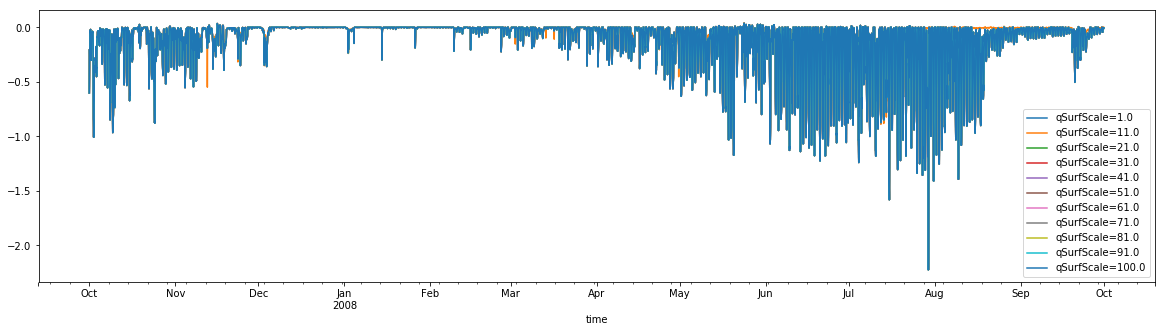

In [86]:
total_ET_df.plot()
plt.show()

In [87]:
# resampleing monthly
total_ET_df_month = total_ET_df.resample("M").mean()
# highlight monthly maximum 
total_ET_df_month.style.highlight_max()

,qSurfScale=1.0,qSurfScale=11.0,qSurfScale=21.0,qSurfScale=31.0,qSurfScale=41.0,qSurfScale=51.0,qSurfScale=61.0,qSurfScale=71.0,qSurfScale=81.0,qSurfScale=91.0,qSurfScale=100.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.163624,-0.16738,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739
2007-11-30 00:00:00,-0.0868632,-0.0758189,-0.0868386,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632
2007-12-31 00:00:00,-0.0105162,-0.00832294,-0.0105116,-0.0105161,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162
2008-01-31 00:00:00,-0.00578708,-0.00478635,-0.00584728,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708
2008-02-29 00:00:00,-0.0126589,-0.00985392,-0.0126521,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589
2008-03-31 00:00:00,-0.0258629,-0.021731,-0.025852,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629
2008-04-30 00:00:00,-0.0882396,-0.0678568,-0.0881948,-0.0882395,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396
2008-05-31 00:00:00,-0.181863,-0.150293,-0.18182,-0.181862,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863
2008-06-30 00:00:00,-0.306062,-0.289537,-0.30605,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062


In [88]:
# highlight monthly minimum 
total_ET_df_month.style.highlight_min()

,qSurfScale=1.0,qSurfScale=11.0,qSurfScale=21.0,qSurfScale=31.0,qSurfScale=41.0,qSurfScale=51.0,qSurfScale=61.0,qSurfScale=71.0,qSurfScale=81.0,qSurfScale=91.0,qSurfScale=100.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.163624,-0.16738,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739
2007-11-30 00:00:00,-0.0868632,-0.0758189,-0.0868386,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632
2007-12-31 00:00:00,-0.0105162,-0.00832294,-0.0105116,-0.0105161,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162
2008-01-31 00:00:00,-0.00578708,-0.00478635,-0.00584728,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708
2008-02-29 00:00:00,-0.0126589,-0.00985392,-0.0126521,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589
2008-03-31 00:00:00,-0.0258629,-0.021731,-0.025852,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629
2008-04-30 00:00:00,-0.0882396,-0.0678568,-0.0881948,-0.0882395,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396
2008-05-31 00:00:00,-0.181863,-0.150293,-0.18182,-0.181862,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863
2008-06-30 00:00:00,-0.306062,-0.289537,-0.30605,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062


In [89]:
# display monthly gradient according to the the value
total_ET_df_month.style.background_gradient()

,qSurfScale=1.0,qSurfScale=11.0,qSurfScale=21.0,qSurfScale=31.0,qSurfScale=41.0,qSurfScale=51.0,qSurfScale=61.0,qSurfScale=71.0,qSurfScale=81.0,qSurfScale=91.0,qSurfScale=100.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.163624,-0.16738,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739
2007-11-30 00:00:00,-0.0868632,-0.0758189,-0.0868386,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632
2007-12-31 00:00:00,-0.0105162,-0.00832294,-0.0105116,-0.0105161,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162
2008-01-31 00:00:00,-0.00578708,-0.00478635,-0.00584728,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708
2008-02-29 00:00:00,-0.0126589,-0.00985392,-0.0126521,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589
2008-03-31 00:00:00,-0.0258629,-0.021731,-0.025852,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629
2008-04-30 00:00:00,-0.0882396,-0.0678568,-0.0881948,-0.0882395,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396
2008-05-31 00:00:00,-0.181863,-0.150293,-0.18182,-0.181862,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863
2008-06-30 00:00:00,-0.306062,-0.289537,-0.30605,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062


In [90]:
# display monthly bar according to the the value
total_ET_df_month.style.bar()

,qSurfScale=1.0,qSurfScale=11.0,qSurfScale=21.0,qSurfScale=31.0,qSurfScale=41.0,qSurfScale=51.0,qSurfScale=61.0,qSurfScale=71.0,qSurfScale=81.0,qSurfScale=91.0,qSurfScale=100.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.163624,-0.16738,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739,-0.16739
2007-11-30 00:00:00,-0.0868632,-0.0758189,-0.0868386,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632,-0.0868632
2007-12-31 00:00:00,-0.0105162,-0.00832294,-0.0105116,-0.0105161,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162,-0.0105162
2008-01-31 00:00:00,-0.00578708,-0.00478635,-0.00584728,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708,-0.00578708
2008-02-29 00:00:00,-0.0126589,-0.00985392,-0.0126521,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589,-0.0126589
2008-03-31 00:00:00,-0.0258629,-0.021731,-0.025852,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629,-0.0258629
2008-04-30 00:00:00,-0.0882396,-0.0678568,-0.0881948,-0.0882395,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396,-0.0882396
2008-05-31 00:00:00,-0.181863,-0.150293,-0.18182,-0.181862,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863,-0.181863
2008-06-30 00:00:00,-0.306062,-0.289537,-0.30605,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062,-0.306062


### 5-4) Parameter4 = summerLAI

In [91]:
para_name, parameter, summerLAI_output_list = sensitivity_analysis('summerLAI', 0.01, 10.0)

file_suffix is 'summerLAI0.01'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:35:54
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

file_suffix is 'summerLAI3.01'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:36:12
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

file_suffix is 'summerLAI6.01'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:36:30
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

file_suffix is 'summerLAI9.01'.
file_master is '/home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 16:36:49
Name of Model Output control file: /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/choi/Desktop/pysumma/TestCase/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2007-10-01 00:00
   2 simulFinsh: 2008-09-31 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richard

In [92]:
# create pandas DataFrame hourly
ds = xr.open_dataset(summerLAI_output_list[0])
date = ds['scalarCanopyTranspiration'].time
total_ET_df = pd.DataFrame(index = date)
total_ET_df.index = total_ET_df.index.round("H")

In [93]:
# get the value of Total Evapotranspiration from SUMMA output
for i in range(0,11,1):
    ds = xr.open_dataset(summerLAI_output_list[i])
    # Total Evapotranspiration = Canopy Transpiration + Canopy Evaporation + Ground Evaporation
    # Change unit from kgm-2s-1 to mm/hr (mulpitle 3600)
    Total_Evapotranspiration = (ds['scalarCanopyTranspiration'].values+ds['scalarCanopyEvaporation'].values+ds['scalarGroundEvaporation'].values)*3600
    ET_df = pd.DataFrame(Total_Evapotranspiration, index = total_ET_df.index, columns=[para_name+'='+str(parameter[i])])
    total_ET_df = total_ET_df.join(ET_df)

In [94]:
total_ET_df.head()

,summerLAI=0.01,summerLAI=1.01,summerLAI=2.01,summerLAI=3.01,summerLAI=4.01,summerLAI=5.01,summerLAI=6.01,summerLAI=7.01,summerLAI=8.01,summerLAI=9.01,summerLAI=10.0
time,,,,,,,,,,,
2007-10-01 00:00:00,-0.601880,-0.332298,-0.457706,-0.535465,-0.584538,-0.615649,-0.630436,-0.625714,-0.620345,-0.614518,-0.608340
2007-10-01 01:00:00,-0.229443,-0.164229,-0.215135,-0.241374,-0.253025,-0.253778,-0.250290,-0.245485,-0.240066,-0.234278,-0.230509
2007-10-01 02:00:00,-0.207438,-0.129815,-0.178953,-0.206185,-0.219889,-0.223848,-0.223075,-0.219980,-0.216168,-0.211871,-0.208363
2007-10-01 03:00:00,-0.203742,-0.113168,-0.162711,-0.191820,-0.207847,-0.214386,-0.215687,-0.213828,-0.211152,-0.207886,-0.204557
2007-10-01 04:00:00,-0.266627,-0.105542,-0.163350,-0.204535,-0.233669,-0.252238,-0.262961,-0.265968,-0.267734,-0.268479,-0.268141


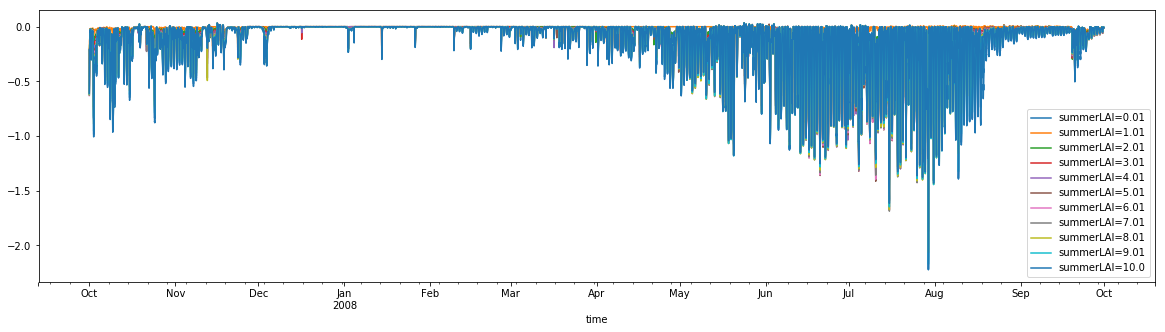

In [95]:
total_ET_df.plot()
plt.show()

In [96]:
# resampleing monthly
total_ET_df_month = total_ET_df.resample("M").mean()
# highlight monthly maximum 
total_ET_df_month.style.highlight_max()

,summerLAI=0.01,summerLAI=1.01,summerLAI=2.01,summerLAI=3.01,summerLAI=4.01,summerLAI=5.01,summerLAI=6.01,summerLAI=7.01,summerLAI=8.01,summerLAI=9.01,summerLAI=10.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.0302352,-0.0690794,-0.0949494,-0.114206,-0.128726,-0.139631,-0.14819,-0.1548,-0.160035,-0.164133
2007-11-30 00:00:00,-0.0868632,-0.0158415,-0.0332143,-0.0451749,-0.0549816,-0.0622371,-0.0681104,-0.073199,-0.0774449,-0.0807186,-0.084016
2007-12-31 00:00:00,-0.0105162,-0.00185999,-0.00307303,-0.00446615,-0.0056602,-0.00665249,-0.00744964,-0.00813696,-0.0088634,-0.00947938,-0.0100155
2008-01-31 00:00:00,-0.00578708,-0.00166236,-0.00166208,-0.00167165,-0.0016624,-0.00314767,-0.00428221,-0.0046429,-0.00500026,-0.00530486,-0.00558294
2008-02-29 00:00:00,-0.0126589,-0.00198313,-0.00198484,-0.00198318,-0.00650571,-0.00779679,-0.00883148,-0.0097624,-0.0105799,-0.0113372,-0.0120037
2008-03-31 00:00:00,-0.0258629,-0.0083477,-0.0083467,-0.014078,-0.0165765,-0.0183218,-0.0199829,-0.0215074,-0.0227402,-0.024025,-0.0251902
2008-04-30 00:00:00,-0.0882396,-0.00775482,-0.0292896,-0.0460889,-0.0581653,-0.0664636,-0.0723755,-0.0769712,-0.0807319,-0.0836737,-0.0860662
2008-05-31 00:00:00,-0.181863,-0.0102912,-0.0975281,-0.142435,-0.167965,-0.181178,-0.186652,-0.189352,-0.188732,-0.187247,-0.183469
2008-06-30 00:00:00,-0.306062,-0.0536546,-0.241896,-0.289436,-0.30517,-0.312595,-0.315922,-0.316166,-0.314942,-0.312585,-0.30937


In [97]:
# highlight monthly minimum 
total_ET_df_month.style.highlight_min()

,summerLAI=0.01,summerLAI=1.01,summerLAI=2.01,summerLAI=3.01,summerLAI=4.01,summerLAI=5.01,summerLAI=6.01,summerLAI=7.01,summerLAI=8.01,summerLAI=9.01,summerLAI=10.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.0302352,-0.0690794,-0.0949494,-0.114206,-0.128726,-0.139631,-0.14819,-0.1548,-0.160035,-0.164133
2007-11-30 00:00:00,-0.0868632,-0.0158415,-0.0332143,-0.0451749,-0.0549816,-0.0622371,-0.0681104,-0.073199,-0.0774449,-0.0807186,-0.084016
2007-12-31 00:00:00,-0.0105162,-0.00185999,-0.00307303,-0.00446615,-0.0056602,-0.00665249,-0.00744964,-0.00813696,-0.0088634,-0.00947938,-0.0100155
2008-01-31 00:00:00,-0.00578708,-0.00166236,-0.00166208,-0.00167165,-0.0016624,-0.00314767,-0.00428221,-0.0046429,-0.00500026,-0.00530486,-0.00558294
2008-02-29 00:00:00,-0.0126589,-0.00198313,-0.00198484,-0.00198318,-0.00650571,-0.00779679,-0.00883148,-0.0097624,-0.0105799,-0.0113372,-0.0120037
2008-03-31 00:00:00,-0.0258629,-0.0083477,-0.0083467,-0.014078,-0.0165765,-0.0183218,-0.0199829,-0.0215074,-0.0227402,-0.024025,-0.0251902
2008-04-30 00:00:00,-0.0882396,-0.00775482,-0.0292896,-0.0460889,-0.0581653,-0.0664636,-0.0723755,-0.0769712,-0.0807319,-0.0836737,-0.0860662
2008-05-31 00:00:00,-0.181863,-0.0102912,-0.0975281,-0.142435,-0.167965,-0.181178,-0.186652,-0.189352,-0.188732,-0.187247,-0.183469
2008-06-30 00:00:00,-0.306062,-0.0536546,-0.241896,-0.289436,-0.30517,-0.312595,-0.315922,-0.316166,-0.314942,-0.312585,-0.30937


In [98]:
# display monthly gradient according to the the value
total_ET_df_month.style.background_gradient()

,summerLAI=0.01,summerLAI=1.01,summerLAI=2.01,summerLAI=3.01,summerLAI=4.01,summerLAI=5.01,summerLAI=6.01,summerLAI=7.01,summerLAI=8.01,summerLAI=9.01,summerLAI=10.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.0302352,-0.0690794,-0.0949494,-0.114206,-0.128726,-0.139631,-0.14819,-0.1548,-0.160035,-0.164133
2007-11-30 00:00:00,-0.0868632,-0.0158415,-0.0332143,-0.0451749,-0.0549816,-0.0622371,-0.0681104,-0.073199,-0.0774449,-0.0807186,-0.084016
2007-12-31 00:00:00,-0.0105162,-0.00185999,-0.00307303,-0.00446615,-0.0056602,-0.00665249,-0.00744964,-0.00813696,-0.0088634,-0.00947938,-0.0100155
2008-01-31 00:00:00,-0.00578708,-0.00166236,-0.00166208,-0.00167165,-0.0016624,-0.00314767,-0.00428221,-0.0046429,-0.00500026,-0.00530486,-0.00558294
2008-02-29 00:00:00,-0.0126589,-0.00198313,-0.00198484,-0.00198318,-0.00650571,-0.00779679,-0.00883148,-0.0097624,-0.0105799,-0.0113372,-0.0120037
2008-03-31 00:00:00,-0.0258629,-0.0083477,-0.0083467,-0.014078,-0.0165765,-0.0183218,-0.0199829,-0.0215074,-0.0227402,-0.024025,-0.0251902
2008-04-30 00:00:00,-0.0882396,-0.00775482,-0.0292896,-0.0460889,-0.0581653,-0.0664636,-0.0723755,-0.0769712,-0.0807319,-0.0836737,-0.0860662
2008-05-31 00:00:00,-0.181863,-0.0102912,-0.0975281,-0.142435,-0.167965,-0.181178,-0.186652,-0.189352,-0.188732,-0.187247,-0.183469
2008-06-30 00:00:00,-0.306062,-0.0536546,-0.241896,-0.289436,-0.30517,-0.312595,-0.315922,-0.316166,-0.314942,-0.312585,-0.30937


In [99]:
# display monthly bar according to the the value
total_ET_df_month.style.bar()

,summerLAI=0.01,summerLAI=1.01,summerLAI=2.01,summerLAI=3.01,summerLAI=4.01,summerLAI=5.01,summerLAI=6.01,summerLAI=7.01,summerLAI=8.01,summerLAI=9.01,summerLAI=10.0
time,,,,,,,,,,,
2007-10-31 00:00:00,-0.16739,-0.0302352,-0.0690794,-0.0949494,-0.114206,-0.128726,-0.139631,-0.14819,-0.1548,-0.160035,-0.164133
2007-11-30 00:00:00,-0.0868632,-0.0158415,-0.0332143,-0.0451749,-0.0549816,-0.0622371,-0.0681104,-0.073199,-0.0774449,-0.0807186,-0.084016
2007-12-31 00:00:00,-0.0105162,-0.00185999,-0.00307303,-0.00446615,-0.0056602,-0.00665249,-0.00744964,-0.00813696,-0.0088634,-0.00947938,-0.0100155
2008-01-31 00:00:00,-0.00578708,-0.00166236,-0.00166208,-0.00167165,-0.0016624,-0.00314767,-0.00428221,-0.0046429,-0.00500026,-0.00530486,-0.00558294
2008-02-29 00:00:00,-0.0126589,-0.00198313,-0.00198484,-0.00198318,-0.00650571,-0.00779679,-0.00883148,-0.0097624,-0.0105799,-0.0113372,-0.0120037
2008-03-31 00:00:00,-0.0258629,-0.0083477,-0.0083467,-0.014078,-0.0165765,-0.0183218,-0.0199829,-0.0215074,-0.0227402,-0.024025,-0.0251902
2008-04-30 00:00:00,-0.0882396,-0.00775482,-0.0292896,-0.0460889,-0.0581653,-0.0664636,-0.0723755,-0.0769712,-0.0807319,-0.0836737,-0.0860662
2008-05-31 00:00:00,-0.181863,-0.0102912,-0.0975281,-0.142435,-0.167965,-0.181178,-0.186652,-0.189352,-0.188732,-0.187247,-0.183469
2008-06-30 00:00:00,-0.306062,-0.0536546,-0.241896,-0.289436,-0.30517,-0.312595,-0.315922,-0.316166,-0.314942,-0.312585,-0.30937
